# Oluwatosin Alabi

# Practical 7 - Part 1A

The aim of part 1A is to calculate the homography that best maps two sets of points to one another.  We will (eventually) use this for creating panoramas, and for calculating the 3D pose of planes.  You should use this
template for your code and fill in the missing sections marked "TO DO"


## Import libraries 

In [1]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio


In [2]:
#test code
# X = np.array([[0.6, 0.7, -100.],
#               [1.0, 0.6, 50.],
#               [0.001, 0.002, 1.0]])
# X[0:2,1]
# np.tile([pts2Hom[2,:]],(2,1))
# a = np.array([0, 1, 2])
# a
# c = np.tile(a,(2,1))
# np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
# np.concatenate((np.zeros((3)),np.ones((3)) ), axis=0)

## Test case formulation

To start with, let's set up some start points `pts1Cart` and a homography, `H`, that we can use to generate target points `pts2Cart`. We'll also add some noise to `pts2Cart` to simulate a real world environment. The challenge is to find the same homography, or as close as noise allows, given `pts1Cart` and `pts2Cart`.

__NOTE:__ It may be helpful to set `noiseLevel` to 0 to start with so that you can check if your solution is spot on while debugging. Make sure you set it back to some value, here we use 4, when you're confident your solution works.

In [3]:
# Define a set of two-dimensional Cartesian points
pts1Cart = np.array([[240.5000, 16.8351, 33.5890, 164.2696, 149.1911],
                    [248.8770, 193.5890, 251.3901, 168.4581, 228.7723]])
print ("pts1Cart",pts1Cart) 
# Convert points into homogeneous representation
pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)

# Define a homography
H = np.array([[0.6, 0.7, -100.],
              [1.0, 0.6, 50.],
              [0.001, 0.002, 1.0]])

# Apply a homography to the points
pts2Hom = np.matmul(H,pts1Hom)

# Convert back to Cartesian coordinates
pts2Cart = pts2Hom[0:2,:] / np.tile([pts2Hom[2,:]],(2,1))



# Add a small amount of noise. Set this to zero to begin with to see if your homography solution is spot on.
noiseLevel = 2.0 #0.0 #5.0
pts2Cart = pts2Cart + np.random.normal(0, noiseLevel, pts2Cart.shape)
print ("pts2Cart",pts2Cart)

pts1Cart [[240.5     16.8351  33.589  164.2696 149.1911]
 [248.877  193.589  251.3901 168.4581 228.7723]]
pts2Cart [[128.98368768  30.53781759  60.46725069  79.74468636  96.55226848]
 [254.1092858  130.83487318 154.41703959 211.65806116 210.22162233]]


## Plotting

Let's plot the the first original set of points, `pts1Cart`, in blue and the second set of points, `pts2Cart`, in red. 

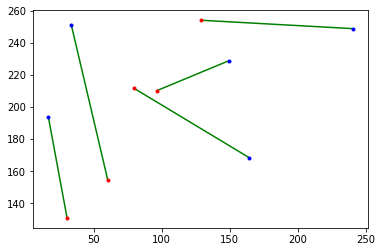

In [4]:
# Plot a green line between pairs of start points (blue) and transformed points (red).|
nPoint = pts1Cart.shape[1]
for cPoint in range(0, nPoint):
    plt.plot([pts1Cart[0,cPoint], pts2Cart[0,cPoint]], [pts1Cart[1,cPoint], pts2Cart[1,cPoint]],'g-')
    plt.plot(pts1Cart[0,cPoint],pts1Cart[1,cPoint],'b.', pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.') 

plt.show()

__The diagram above shows two sets of points, blue points and red points. A homography maps the blue points to corresponding red points__

## Homography estimation time!

We've formulated our test example; now our goal is to estimate the homography that maps the first set of points to the second set of points.

### ****TO DO****: Fill in the details of these routines (solveAXEqualsZero and calcBestHomography). 

In [5]:
def solveAXEqualsZero(A):
    # TO DO: Write this routine - it should solve Ah = 0. You can do this using SVD. Consult your notes! 
    # Hint: SVD will be involved.
    u, s, h = np.linalg.svd(A)
    
    new_h = np.transpose(h)
    
    last_column = new_h[:,-1]
    return last_column

In [6]:
def calcBestHomography(pts1Cart, pts2Cart):
    
    # This function should apply the direct linear transform (DLT) algorithm to calculate the best 
    # homography that maps the cartesian points in pts1Cart to their corresonding matching cartesian poitns 
    # in pts2Cart.
    
    # This function calls solveAXEqualsZero. Make sure you are wary of how to reshape h into a 3 by 3 matrix. 

    n_points = pts1Cart.shape[1]
    
    # TO DO: replace this:

    # TO DO: 
    # First convert points into homogeneous representation
    # Hint: we've done this before  in the skeleton code we provide.
    pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
    pts2Hom = np.concatenate((pts2Cart, np.ones((1,pts2Cart.shape[1]))), axis=0)
    # Then construct the matrix A, size (n_points * 2, 9)
    A = np.ones((n_points * 2, 9));
    
    #create matrix to solve AX = 0
    
    for i in range(n_points):
#         y_value = pts2Hom[1,i]
        first_row = np.concatenate((np.zeros(3),-pts1Hom[:,i], pts2Hom[1,i]*pts1Hom[:,i]), axis=0);
        second_row = np.concatenate((pts1Hom[:,i],np.zeros(3), -pts2Hom[0,i]*pts1Hom[:,i]), axis=0);
        combined_rows = np.vstack((first_row, second_row))
        A[2*i:2*(i+1)] = combined_rows
    # Consult the notes!
    
    H = solveAXEqualsZero(A)
    print("H before, ", H)
    H = H.reshape(3,3)
    print(H)
    # Solve Ah = 0 using solveAXEqualsZero and get h.
    
    # Reshape h into the matrix H, values of h go first into rows of H
    
    
    return H

In [7]:
#test
# pts2Cart
# calcBestHomography(pts1Cart, pts2Cart)
# f = np.ones((8,9))
# f[0:2,:] = np.zeros((2,9))
# f

## Test time!

Time to put it all together. 

Now we need a way of measuring how well our mapping does. To do this we will apply our estimated mapping, `HEst`, to `pts1Cart` and obtain estimated points `pts2EstCart`. We will compare `pts2EstCart` and `pts2Cart` using a sum of squared difference to see how well our solution at least approximates the transformed noisy points `pts2Cart`.

Red points on the plot are the noisy points we observe, `pts2Cart`, and the magenta points are the transformed points, `pts2EstCart`, that we get when we apply our estimated homography on `pts1Cart`. The black lines represent the error between both points; if you've set `noiseLevel` to 0, then `sqDiff` should be 0 and the points should overlap perfectly.

H before,  [-5.65596001e-03 -6.30936167e-03  9.52560821e-01 -8.82204080e-03
 -5.84716889e-03 -3.03940634e-01 -9.20522223e-06 -2.03303366e-05
 -8.00976152e-03]
[[-5.65596001e-03 -6.30936167e-03  9.52560821e-01]
 [-8.82204080e-03 -5.84716889e-03 -3.03940634e-01]
 [-9.20522223e-06 -2.03303366e-05 -8.00976152e-03]]
Sqaured difference between pts2Cart and pts2EstCart is: 0.79


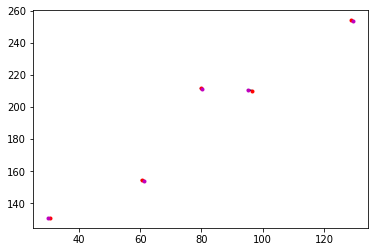

In [8]:
# Replace this with a call to the function calcBestHomography. You'll need to figure out which way around the 
# points go in the function, i.e. which direction this homography transforms points from and to. The ordering 
# is dead simple for now but acts as a simple exercise for what comes in later parts of this practical.
HEst = calcBestHomography(pts1Cart, pts2Cart)

# Apply estimated homography to points
pts2EstHom = np.matmul(HEst,pts1Hom)

# Convert back to Cartesian coordinates
pts2EstCart = pts2EstHom[0:2,:] / np.tile([pts2EstHom[2,:]],(2,1))

# Calculate the mean squared distance from actual points
sqDiff = np.mean(sum((pts2Cart - pts2EstCart)**2))

print("Sqaured difference between pts2Cart and pts2EstCart is: %.2f" % sqDiff)

# Draw figure with points before and after applying the estimated homography
nPoint = pts1Cart.shape[1]

# Plot a black line between pairs of actual points (red) and estimated points (magenta)
for cPoint in range(0, nPoint):
    plt.plot([pts2Cart[0,cPoint], pts2EstCart[0,cPoint]], [pts2Cart[1,cPoint], pts2EstCart[1,cPoint]],'k-')
    plt.plot(pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.',pts2EstCart[0,cPoint],pts2EstCart[1,cPoint],'m.') 

plt.show()

__The homography estimated by the routine performs a very similar transformation as the original homography__ 

__The accuracy of the homography is proportional to the amount of noise in the readings which is quite logical__

## Other things **** TO DO ****

1: Convince yourself that the homography is ambiguous up to scale (by
multiplying it by a constant factor and showing it does the same thing).
Can you see why this is the case mathematically?

2: Show empirically that your homography routine can EXACTLY map any four points to any
other four points.

__Scale the hompgraphy and check what happens__

H before,  [-5.65596001e-03 -6.30936167e-03  9.52560821e-01 -8.82204080e-03
 -5.84716889e-03 -3.03940634e-01 -9.20522223e-06 -2.03303366e-05
 -8.00976152e-03]
[[-5.65596001e-03 -6.30936167e-03  9.52560821e-01]
 [-8.82204080e-03 -5.84716889e-03 -3.03940634e-01]
 [-9.20522223e-06 -2.03303366e-05 -8.00976152e-03]]
Sqaured difference between pts2Cart and pts2EstCart is: 0.79


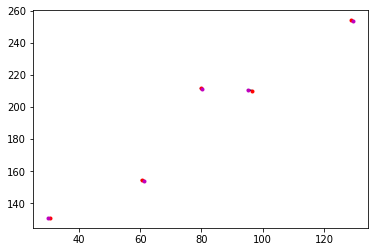

In [9]:

HEst = calcBestHomography(pts1Cart, pts2Cart)

# Scale homography

HEst = 3*HEst; 

# Apply estimated homography to points
pts2EstHom = np.matmul(HEst,pts1Hom)

# Convert back to Cartesian coordinates
pts2EstCart = pts2EstHom[0:2,:] / np.tile([pts2EstHom[2,:]],(2,1))

# Calculate the mean squared distance from actual points
sqDiff = np.mean(sum((pts2Cart - pts2EstCart)**2))

print("Sqaured difference between pts2Cart and pts2EstCart is: %.2f" % sqDiff)

# Draw figure with points before and after applying the estimated homography
nPoint = pts1Cart.shape[1]

# Plot a black line between pairs of actual points (red) and estimated points (magenta)
for cPoint in range(0, nPoint):
    plt.plot([pts2Cart[0,cPoint], pts2EstCart[0,cPoint]], [pts2Cart[1,cPoint], pts2EstCart[1,cPoint]],'k-')
    plt.plot(pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.',pts2EstCart[0,cPoint],pts2EstCart[1,cPoint],'m.') 

plt.show()

__Scaling the homography produces the same graph and the same value for squared difference between pts2cart and pts2__

__Converting from homogeneous coordinates to cartesian coordinates involves division by the z coordinate values for each point. When scaling is done on an homography, the z coordinates are also scaled. When converting back to cartesian coordinates, we divide by the SCALED z value, which essentially removes the original scaling__

**TO DO**
Show empirically that your homography routine can EXACTLY map any four points to any other four points.

In [10]:
# Trying some other sets of points
pts1CartTest = np.array([[210.5000, 36.8351, 23.5890, 164.2696, 39.2345],
                    [248.8770, 190.5890, 261.2356, 100.4521, 128.7723]])
print ("pts1CartTest",pts1CartTest) 
# Convert points into homogeneous representation
pts1HomTest = np.concatenate((pts1CartTest, np.ones((1,pts1CartTest.shape[1]))), axis=0)

# Define a homography
HTest = np.array([[0.8, 0.7, -50.],
              [1.0, 0.9, 20.],
              [0.003, 0.02, 1.0]])

# Apply a homography to the points
pts2HomTest = np.matmul(HTest,pts1HomTest)

# Convert back to Cartesian coordinates
pts2CartTest = pts2HomTest[0:2,:] / np.tile([pts2HomTest[2,:]],(2,1))



# Add a small amount of noise. Set this to zero to begin with to see if your homography solution is spot on.
noiseLevel = 1.0 #0.0 #5.0
pts2CartTest = pts2CartTest + np.random.normal(0, noiseLevel, pts2CartTest.shape)
print ("pts2CartTest",pts2CartTest)

pts1CartTest [[210.5     36.8351  23.589  164.2696  39.2345]
 [248.877  190.589  261.2356 100.4521 128.7723]]
pts2CartTest [[43.34023826 24.24325709 25.06332294 44.45595247 18.98510183]
 [68.12514146 47.37607326 44.29652021 79.71494387 46.46209371]]


H before,  [ 8.17165466e-03  5.47625201e-03 -7.36406873e-01  1.20273974e-02
  7.43024502e-03 -6.76262357e-01  1.14307274e-04  1.56924283e-04
 -8.80181998e-03]
[[ 8.17165466e-03  5.47625201e-03 -7.36406873e-01]
 [ 1.20273974e-02  7.43024502e-03 -6.76262357e-01]
 [ 1.14307274e-04  1.56924283e-04 -8.80181998e-03]]
Sqaured difference between pts2Cart and pts2EstCart is: 0.46


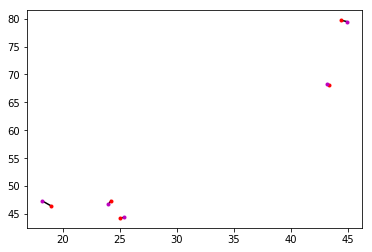

In [11]:
HEstTest = calcBestHomography(pts1CartTest, pts2CartTest)

# Apply estimated homography to points
pts2EstHomTest = np.matmul(HEstTest,pts1HomTest)

# Convert back to Cartesian coordinates
pts2EstCartTest = pts2EstHomTest[0:2,:] / np.tile([pts2EstHomTest[2,:]],(2,1))

# Calculate the mean squared distance from actual points
sqDiffTest = np.mean(sum((pts2CartTest - pts2EstCartTest)**2))

print("Sqaured difference between pts2Cart and pts2EstCart is: %.2f" % sqDiffTest)

# Draw figure with points before and after applying the estimated homography
nPoint = pts1CartTest.shape[1]

# Plot a black line between pairs of actual points (red) and estimated points (magenta)
for cPoint in range(0, nPoint):
    plt.plot([pts2CartTest[0,cPoint], pts2EstCartTest[0,cPoint]], [pts2CartTest[1,cPoint], pts2EstCartTest[1,cPoint]],'k-')
    plt.plot(pts2CartTest[0,cPoint],pts2CartTest[1,cPoint],'r.',pts2EstCartTest[0,cPoint],pts2EstCartTest[1,cPoint],'m.') 

plt.show()

__Trying various values of points ad different homographies, the estimated homography still makes a very reasonable estimation. The accuracy of estimation depends on noise levels.__